In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
#from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 
from functools import reduce

from tensorflow.keras import datasets, layers, models

In [3]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar10.load_data()

In [4]:
print(y_train_org[2])

[9]


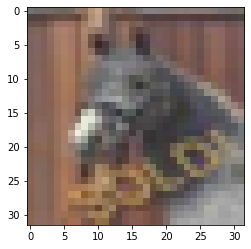

In [20]:
n = 1488

plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

In [1]:
print(len(x_test_org[0][0]))

a = np.array([[[[3, 4], [5, 8]], [[2, 2], [8, 7]]], [[[7, 9], [2, 5]], [[0, 3], [5, 88]]]])
# print(a.reshape(2, 8))
print(a.shape)
print(type(a))

print(x_train_org.shape)
print(type(x_train_org))
print(len(x_train_org))
s = x_train_org.shape



NameError: name 'x_test_org' is not defined

In [22]:
shape_len = reduce(lambda x, y: x*y, x_train_org.shape[1:])
print(x_train_org.shape)
print(x_test_org.shape)
x_train = x_train_org.reshape(x_train_org.shape[0], shape_len)

x_test = x_test_org.reshape(x_test_org.shape[0], shape_len)

# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [23]:
model = Sequential()
# Перший шар з 800 нейронів, 784 входів в кожний нейрон
model.add(Dense(800, input_dim=shape_len, activation="relu"))
model.add(Dense(400, activation="relu"))
# Вихідний шар з 10 нейронів за кількістю рукописних цифр)
model.add(Dense(10, activation="softmax"))

In [24]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 11s 283us/sample - loss: 2.0152 - accuracy: 0.2931 - val_loss: 1.8214 - val_accuracy: 0.3595
Epoch 2/20
40000/40000 [==============================] - 11s 266us/sample - loss: 1.7379 - accuracy: 0.3816 - val_loss: 1.7352 - val_accuracy: 0.3737
Epoch 3/20
40000/40000 [==============================] - 11s 269us/sample - loss: 1.6424 - accuracy: 0.4165 - val_loss: 1.6561 - val_accuracy: 0.4031
Epoch 4/20
40000/40000 [==============================] - 11s 266us/sample - loss: 1.5806 - accuracy: 0.4379 - val_loss: 1.5874 - val_accuracy: 0.4384
Epoch 5/20
40000/40000 [==============================] - 11s 266us/sample - loss: 1.5379 - accuracy: 0.4530 - val_loss: 1.5410 - val_accuracy: 0.4617
Epoch 6/20
40000/40000 [==============================] - 11s 271us/sample - loss: 1.5002 - accuracy: 0.4671 - val_loss: 1.5769 - val_accuracy: 0.4351
Epoch 7/20
40000/40000 [====================

[[3.7803559e-03 1.8100956e-02 2.4807226e-02 ... 4.9371198e-03
  1.2012175e-02 1.5396450e-02]
 [3.4412965e-02 3.5141964e-02 4.0928755e-04 ... 6.2050740e-04
  4.6384043e-01 4.6322894e-01]
 [6.5548933e-01 1.7752330e-01 4.5855498e-04 ... 3.7406705e-02
  6.0882486e-02 6.6138856e-02]
 ...
 [1.8248769e-03 5.4047222e-04 1.5802681e-01 ... 4.1612744e-02
  1.6469331e-02 3.7240516e-03]
 [3.5674132e-03 1.3981487e-03 1.1272180e-01 ... 6.4307943e-02
  8.5913757e-04 2.7525353e-03]
 [1.9629886e-02 2.4239745e-03 9.1569707e-02 ... 5.9298670e-01
  5.8094799e-03 1.1188758e-02]]
6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


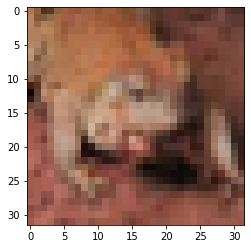

In [25]:
y_pred = model.predict(x_test)
print(y_pred)
print(np.argmax(y_pred[5]))
print(y_test[5])

plt.imshow(Image.fromarray(x_test_org[5]).convert('RGBA'))
plt.show()